In [2]:
#Import Required Libraries
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Load dataset
supermart_grocery_sales= pd.read_csv(r"C:\Users\rohit\OneDrive\Documents\supermart_grocery_sales.csv")

# View dataset
supermart_grocery_sales.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [6]:
# Dataset shape and info
print("Shape:", supermart_grocery_sales.shape)
supermart_grocery_sales.info()


Shape: (9994, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [8]:
# Data Cleaning & Preparation
# 1.  Missing values
supermart_grocery_sales.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [10]:
# 2. Remove duplicates if any
supermart_grocery_sales = supermart_grocery_sales.drop_duplicates()

In [15]:
# Convert Order Date to datetime (handles mixed formats)
supermart_grocery_sales['Order Date'] = pd.to_datetime(
    supermart_grocery_sales['Order Date'],
    format='mixed',
    errors='coerce'
)

# Create date-based features
supermart_grocery_sales['Order_Year'] = supermart_grocery_sales['Order Date'].dt.year
supermart_grocery_sales['Order_Month'] = supermart_grocery_sales['Order Date'].dt.month
supermart_grocery_sales['Order_Day'] = supermart_grocery_sales['Order Date'].dt.day



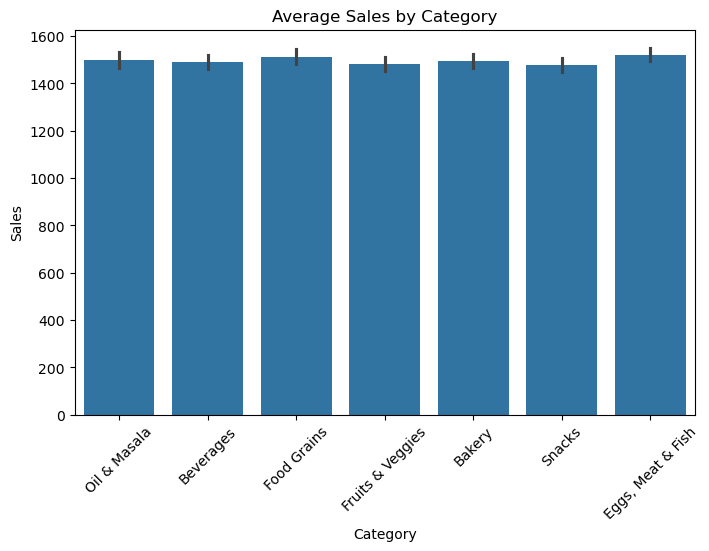

In [16]:
#Exploratory Data Analysis (EDA)
# 1. Sales by Category
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Sales', data=supermart_grocery_sales, estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average Sales by Category")
plt.show()

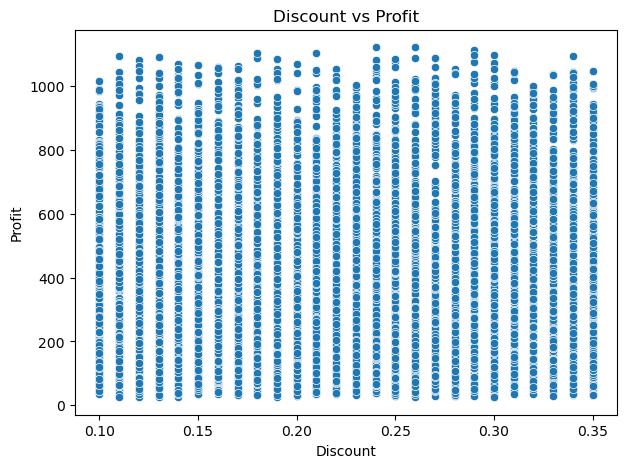

In [24]:
# 2. Profit vs Discount Relationship
plt.figure(figsize=(7,5))
sns.scatterplot(x='Discount', y='Profit', data=supermart_grocery_sales)
plt.title("Discount vs Profit")
plt.show()

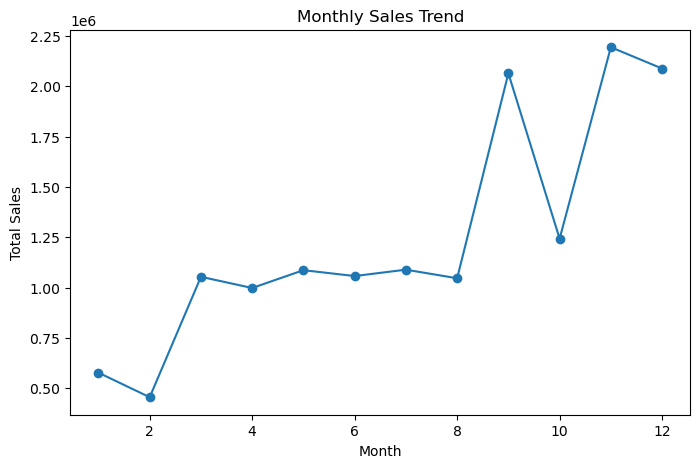

In [26]:
# 3. Monthly Sales Trend
monthly_sales = supermart_grocery_sales.groupby('Order_Month')['Sales'].sum()

plt.figure(figsize=(8,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [27]:
# Feature Selection
# 1. We will predict Sales

y = supermart_grocery_sales['Sales']

In [29]:
# 2. Input Features
X = supermart_grocery_sales.drop(columns=['Sales', 'Order ID', 'Customer Name', 'Order Date'])

In [30]:
# Encoding & Scaling 
# 1. Identify categorical and numerical columns
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [40]:
# Preprocessing pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Preprocessing step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Model pipeline
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])


In [41]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [42]:
#Model Training (Linear Regression)
# 1. Create ML pipeline
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# 2. Train model
model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [43]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 381.4705261538142
MSE: 214934.83685620854
RMSE: 463.61065222469654
R2 Score: 0.34832014962109936


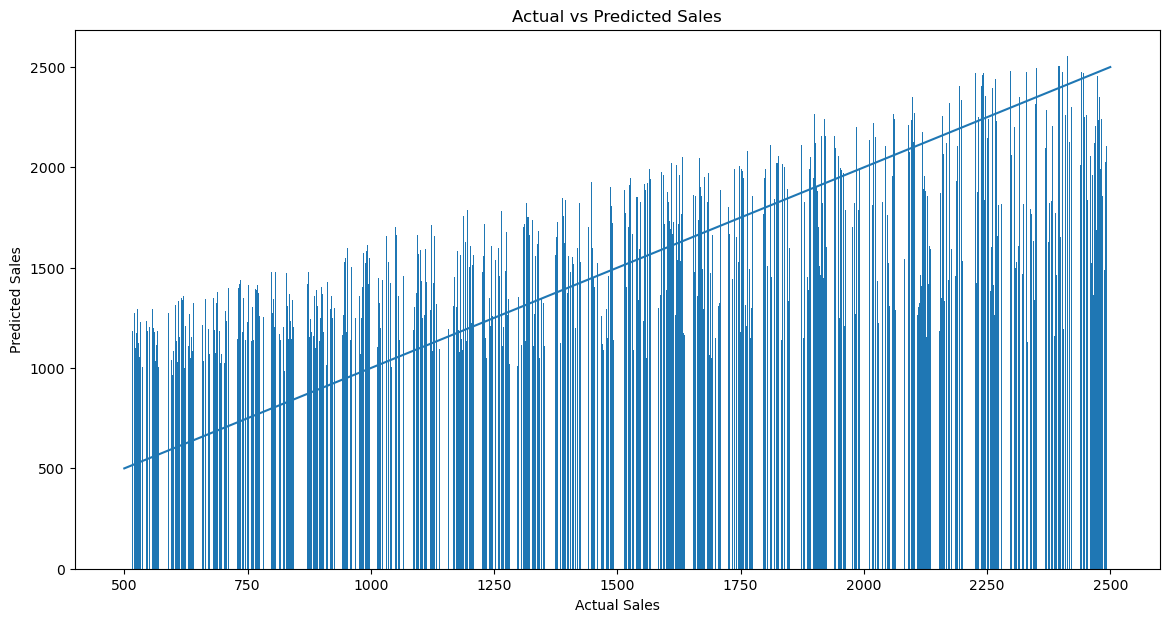

In [59]:
# Actual vs Predicted Visualization
plt.figure(figsize=(14,7))
plt.bar(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

Order_Year
2015    2975599
2016    3131959
2017    3871912
2018    4977512
Name: Sales, dtype: int64


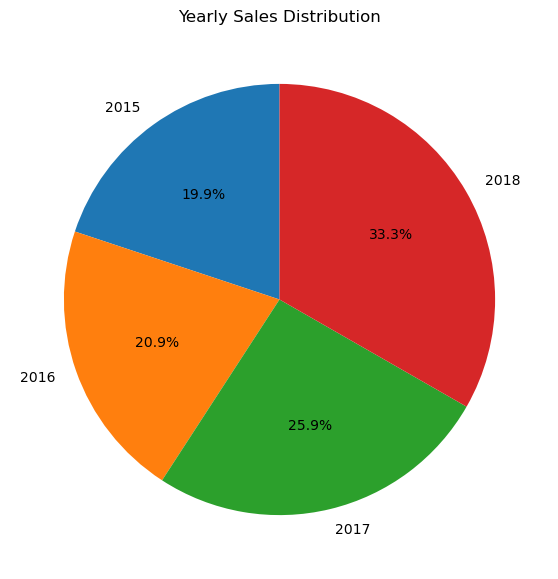

In [61]:
import matplotlib.pyplot as plt

# Group data by year and calculate total sales
yearly_sales = supermart_grocery_sales.groupby('Order_Year')['Sales'].sum()

# Display yearly sales
print(yearly_sales)

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(yearly_sales,
        labels=yearly_sales.index,
        autopct='%1.1f%%',
        startangle=90)

plt.title("Yearly Sales Distribution")
plt.show()


City
Kanyakumari    706764
Vellore        676550
Bodi           667177
Tirunelveli    659812
Perambalur     659738
Salem          657093
Pudukottai     653179
Tenkasi        643652
Karur          642273
Krishnagiri    637273
Name: Sales, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Kanyakumari'),
  Text(1, 0, 'Vellore'),
  Text(2, 0, 'Bodi'),
  Text(3, 0, 'Tirunelveli'),
  Text(4, 0, 'Perambalur'),
  Text(5, 0, 'Salem'),
  Text(6, 0, 'Pudukottai'),
  Text(7, 0, 'Tenkasi'),
  Text(8, 0, 'Karur'),
  Text(9, 0, 'Krishnagiri')])

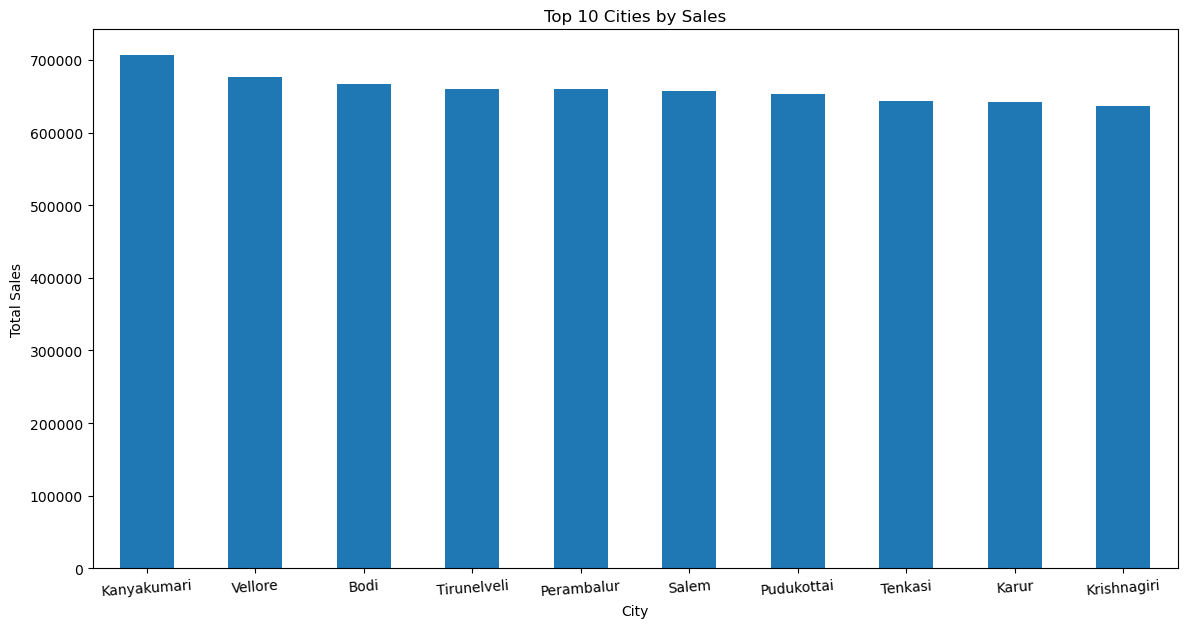

In [66]:
import matplotlib.pyplot as plt

# Group data by City and calculate total sales
city_sales =supermart_grocery_sales.groupby('City')['Sales'].sum()

# Select top 5 cities
top_10_cities = city_sales.sort_values(ascending=False).head(10)

# Display top 5 cities
print(top_10_cities)

# Plot bar graph
plt.figure(figsize=(14,7))
top_10_cities.plot(kind='bar')

plt.title("Top 10 Cities by Sales")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=4)
